In [20]:
# info in one array
from PIL import Image
from os import listdir
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
from ipywidgets import IntProgress
from IPython.display import display
import winsound
import cv2
import numpy as np
import os

f = IntProgress(min=0, max=len(listdir('symbolsforanalyzer')))
display(f)
characters = []
for i in range(len(listdir('symbolsforanalyzer'))):
    characters.append([0] * 2)
print(characters)

symbols_num = 0
symbols = list()

# filename format x y (top left corner) then x y size
for i in range(0,len(listdir('symbolsforanalyzer/'))):
    f.value +=1
    _location = list()
    j = 0
    filename = listdir('symbolsforanalyzer/')[i]
    for symbol in filename:
        if symbol == '_' or symbol == '.':
            _location.append(j)
        j += 1
    print(_location)
    x_left = int(filename[0:_location[0]])
    # when do [#:#] the last # is not included in there y_up
    print(x_left)
    y_up = int(filename[_location[0]+1:_location[1]])
    print(y_up)
    x_size = int(filename[_location[1]+1:_location[2]])
    print(x_size)
    y_size = int(filename[_location[2]+1:_location[3]])
    print(y_size)
    #img_label.append(filename[_location[3]+1:_location[4]])
    characters[i].append(filename[_location[3]+1:_location[4]])
    print(filename[_location[3]+1:_location[4]])
    #img_x.append(int(x_left+x_size / 2))
    characters[i][0] = int(x_left+x_size / 2)
    print(int(x_left+x_size / 2))
    #img_y.append(int(y_up+y_size / 2))
    characters[i][1] = int(y_up+y_size / 2)
    
    if characters[i][2] in ['plus', 'times', '-']:
        symbols_num += 1
        symbols.append(characters[i])
    print(int(y_up+y_size / 2))
    print(filename)
    print(symbols)
    print(symbols_num)

print(characters)
#print(type(characters))    

IntProgress(value=0, max=12)

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[3, 7, 10, 14, 16]
231
289
62
128
5
262
353
231_289_62_128_5.png
[]
0
[3, 7, 10, 14, 16]
236
474
84
144
6
278
546
236_474_84_144_6.png
[]
0
[3, 7, 10, 14, 16]
251
131
16
116
1
259
189
251_131_16_116_1.png
[]
0
[3, 7, 10, 14, 16]
372
126
96
139
2
420
195
372_126_96_139_2.png
[]
0
[3, 7, 10, 14, 16]
378
286
63
128
6
409
350
378_286_63_128_6.png
[]
0
[3, 5, 8, 11, 13]
406
7
13
67
1
412
40
406_7_13_67_1.png
[]
0
[3, 7, 10, 14, 16]
407
472
61
140
8
437
542
407_472_61_140_8.png
[]
0
[3, 7, 11, 15, 17]
548
269
121
126
7
608
332
548_269_121_126_7.png
[]
0
[3, 7, 10, 14, 16]
551
132
66
127
3
584
195
551_132_66_127_3.png
[]
0
[3, 7, 10, 14, 16]
594
478
76
127
0
632
541
594_478_76_127_0.png
[]
0
[2, 6, 10, 13, 15]
70
428
673
45
-
406
450
70_428_673_45_-.png
[[406, 450, '-']]
1
[2, 6, 9, 13, 18]
81
312
71
109
plus
116
366
81_312_71_109_plus.png
[[406, 450, '-'], [116, 366, 'plus']]
2
[[262, 353, '5'], 

In [112]:
# info in one array
# with x,y,x-size,y-size in there
from PIL import Image
from os import listdir
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
from ipywidgets import IntProgress
from IPython.display import display
import winsound
import cv2
import numpy as np
import os

f = IntProgress(min=0, max=len(listdir('symbolsforanalyzer')))
display(f)
characters = []
for i in range(len(listdir('symbolsforanalyzer'))):
    characters.append([0] * 4)
print(characters)

symbols_num = 0
symbols = list()

# filename format x y (top left corner) then x y size
for i in range(0,len(listdir('symbolsforanalyzer/'))):
    f.value +=1
    _location = list()
    j = 0
    filename = listdir('symbolsforanalyzer/')[i]
    for symbol in filename:
        if symbol == '_' or symbol == '.':
            _location.append(j)
        j += 1
    print(_location)
    x_left = int(filename[0:_location[0]])
    # when do [#:#] the last # is not included in there y_up
    print(x_left)
    y_up = int(filename[_location[0]+1:_location[1]])
    print(y_up)
    x_size = int(filename[_location[1]+1:_location[2]])
    print(x_size)
    y_size = int(filename[_location[2]+1:_location[3]])
    print(y_size)
    characters[i].append(filename[_location[3]+1:_location[4]])
    print(filename[_location[3]+1:_location[4]])
    characters[i][0] = int(x_left)
    characters[i][1] = int(y_up)
    characters[i][2] = int(x_size)
    characters[i][3] = int(y_size)
    
    
    if characters[i][4] in ['plus', 'times', '-']:
        symbols_num += 1
        symbols.append(characters[i])
    print(int(y_up+y_size / 2))
    print(filename)
    print(symbols)
    print(symbols_num)

print(characters)
#print(type(characters))    

IntProgress(value=0, max=12)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
[3, 7, 10, 14, 16]
231
289
62
128
5
353
231_289_62_128_5.png
[]
0
[3, 7, 10, 14, 16]
236
474
84
144
6
546
236_474_84_144_6.png
[]
0
[3, 7, 10, 14, 16]
251
131
16
116
1
189
251_131_16_116_1.png
[]
0
[3, 7, 10, 14, 16]
372
126
96
139
2
195
372_126_96_139_2.png
[]
0
[3, 7, 10, 14, 16]
378
286
63
128
6
350
378_286_63_128_6.png
[]
0
[3, 5, 8, 11, 13]
406
7
13
67
1
40
406_7_13_67_1.png
[]
0
[3, 7, 10, 14, 16]
407
472
61
140
8
542
407_472_61_140_8.png
[]
0
[3, 7, 11, 15, 17]
548
269
121
126
7
332
548_269_121_126_7.png
[]
0
[3, 7, 10, 14, 16]
551
132
66
127
3
195
551_132_66_127_3.png
[]
0
[3, 7, 10, 14, 16]
594
478
76
127
0
541
594_478_76_127_0.png
[]
0
[2, 6, 10, 13, 15]
70
428
673
45
-
450
70_428_673_45_-.png
[[70, 428, 673, 45, '-']]
1
[2, 6, 9, 13, 18]
81
312
71
109
plus
366
81_312_71_109_plus.png
[[70, 428, 673, 45, '-'], 

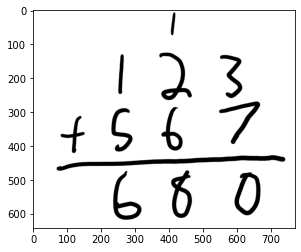

(642, 772, 3)


In [67]:
test_img = cv2.imread('testequations/testequation5.png')
pyplot.imshow(test_img)
pyplot.show()
print(test_img.shape)

In [113]:
def getYFromChar(item):
    return item[1]
symbols.sort(key = getYFromChar)
print(symbols)
operators = list()
operators.append(symbols[0])
lines  = list()
lines.append(symbols[1])
print(lines)
print(operators)

[[81, 312, 71, 109, 'plus'], [70, 428, 673, 45, '-']]
[[70, 428, 673, 45, '-']]
[[81, 312, 71, 109, 'plus']]


In [114]:
# see if intervals line up with each other
row = np.zeros(len(characters), dtype=int)
col = np.zeros(len(characters), dtype=int)
def getYFromChar(item):
    return item[1]
characters.sort(reverse = True, key = getYFromChar)
print(characters)
interval_x = lambda j : [int(characters[j][0] + characters[j][2] * 0.1), int(characters[j][0] + characters[j][2] * 0.9)]
interval_y = lambda j : [int(characters[j][1]  + characters[j][3] * 0.1), int(characters[j][1] + characters[j][3] * 0.9)]


#compare next char to first, layer higher the layer number the more up it is
for i in range(0,len(characters)-1):
    print(interval_y(i))
    print(interval_y(i + 1))
    print()
    if not(interval_y(i + 1)[1] < interval_y(i)[0] or interval_y(i + 1)[0] > interval_y(i)[1]):
        row[i + 1] = row[i]
    else:
        row[i + 1] = row[i] + 1
print(row)
def getXFromChar(item):
    return item[0]
characters.sort(reverse = False, key = getXFromChar)
characters.remove(lines[0])
for i in range(len(characters)-1):
    print(interval_x(i))
    print(interval_x(i + 1))
    print()
    if not(interval_x(i + 1)[1] < interval_x(i)[0] or interval_x(i + 1)[0] > interval_x(i)[1]):
        col[i + 1] = col[i]
    else:
        col[i + 1] = col[i] + 1
characters.append(lines[0])
print(characters)
print(col)
# do not care about line column values
i = 0
for c in col:
    characters[i].append(c)
    i += 1
i = 0
characters.sort(reverse = True, key = getYFromChar)
for r in row:
    characters[i].insert(5, r)
    if characters[i][0:5] == lines[0]:
        lines[0] = characters[i]
    elif characters[i][4] in ['plus', '-', 'times']:
        operators[0] = characters[i]
    i += 1
print(characters)

[[594, 478, 76, 127, '0'], [236, 474, 84, 144, '6'], [407, 472, 61, 140, '8'], [70, 428, 673, 45, '-'], [81, 312, 71, 109, 'plus'], [231, 289, 62, 128, '5'], [378, 286, 63, 128, '6'], [548, 269, 121, 126, '7'], [551, 132, 66, 127, '3'], [251, 131, 16, 116, '1'], [372, 126, 96, 139, '2'], [406, 7, 13, 67, '1']]
[490, 592]
[488, 603]

[488, 603]
[486, 598]

[486, 598]
[432, 468]

[432, 468]
[322, 410]

[322, 410]
[301, 404]

[301, 404]
[298, 401]

[298, 401]
[281, 382]

[281, 382]
[144, 246]

[144, 246]
[142, 235]

[142, 235]
[139, 251]

[139, 251]
[13, 67]

[0 0 0 1 2 2 2 2 3 3 3 4]
[88, 144]
[237, 286]

[237, 286]
[244, 311]

[244, 311]
[252, 265]

[252, 265]
[381, 458]

[381, 458]
[384, 434]

[384, 434]
[407, 417]

[407, 417]
[413, 461]

[413, 461]
[560, 656]

[560, 656]
[557, 610]

[557, 610]
[601, 662]

[[81, 312, 71, 109, 'plus'], [231, 289, 62, 128, '5'], [236, 474, 84, 144, '6'], [251, 131, 16, 116, '1'], [372, 126, 96, 139, '2'], [378, 286, 63, 128, '6'], [406, 7, 13, 67, '1'], 

In [ ]:
#plot line to the right most of image then will move more left until it most minimizes the distance 

In [10]:
# with big character list, organize into layers
y_thresh = 20
x_thresh = 30
row = np.zeros(len(characters), dtype=int)
col = np.zeros(len(characters), dtype=int)
def getYFromChar(item):
    return item[1]
characters.sort(reverse = True, key = getYFromChar)
print(characters)

#compare next char to first, layer higher the layer number the more up it is
for i in range(0,len(characters)-1):
    #print(characters[i + 1][1])
    #print(characters[i][1]+y_thresh)
    #print(characters[i][1]-y_thresh)
    #print(characters[i][1])
    #print((characters[i + 1][1] < characters[i][1] - y_thresh) and (character[i + 1][1] > character[i][1] - y_thresh))
    if np.absolute(characters[i + 1][1] - characters[i][1]) < y_thresh:
        row[i + 1] = row[i]
    elif characters[i + 1][1] - characters[i][1] <= y_thresh:
        row[i + 1] = row[i] + 1
print(row)

'''
def getXFromChar(item):
    return item[0]
characters.sort(reverse = False, key = getXFromChar)
print(characters)
for i in range(len(characters)-1):
    if np.absolute(characters[i + 1][0] - characters[i][0]) < x_thresh or (characters[i + 1][0] == lines[0][0] and characters[i + 1][1] == lines[0][1] and characters[i + 1][2] == lines[0][2]) or (characters[i][0] == lines[0][0] and characters[i][1] == lines[0][1] and characters[i][2] == lines[0][2]):
        col[i + 1] = col[i]
    elif characters[i + 1][0] - characters[i][0] >= x_thresh:
        col[i + 1] = col[i] + 1
print(col)
'''

[[278, 546, '6'], [437, 542, '8'], [632, 541, '0'], [406, 450, '-'], [116, 366, 'plus'], [262, 353, '5'], [409, 350, '6'], [608, 332, '7'], [420, 195, '2'], [584, 195, '3'], [259, 189, '1'], [412, 40, '1']]
[0 0 0 1 2 2 2 2 3 3 3 4]


'\ndef getXFromChar(item):\n    return item[0]\ncharacters.sort(reverse = False, key = getXFromChar)\nprint(characters)\nfor i in range(len(characters)-1):\n    if np.absolute(characters[i + 1][0] - characters[i][0]) < x_thresh or (characters[i + 1][0] == lines[0][0] and characters[i + 1][1] == lines[0][1] and characters[i + 1][2] == lines[0][2]) or (characters[i][0] == lines[0][0] and characters[i][1] == lines[0][1] and characters[i][2] == lines[0][2]):\n        col[i + 1] = col[i]\n    elif characters[i + 1][0] - characters[i][0] >= x_thresh:\n        col[i + 1] = col[i] + 1\nprint(col)\n'

In [11]:
def getXFromChar(item):
    return item[0]
characters.sort(reverse = False, key = getXFromChar)
characters.remove(lines[0])
for i in range(len(characters)-1):
    if np.absolute(characters[i + 1][0] - characters[i][0]) < x_thresh:
        col[i + 1] = col[i]
    elif characters[i + 1][0] - characters[i][0] >= x_thresh:
        col[i + 1] = col[i] + 1
characters.append(lines[0])
print(characters)
print(col)
# do not care about line column values
i = 0
for c in col:
    characters[i].append(c)
    i += 1
i = 0
characters.sort(reverse = True, key = getYFromChar)
for r in row:
    characters[i].insert(3, r)
    if characters[i][0:3] == lines[0]:
        lines[0] = characters[i]
    elif characters[i][2] in ['plus', '-', 'times']:
        operators[0] = characters[i]
    i += 1
print(characters)

[[116, 366, 'plus'], [259, 189, '1'], [262, 353, '5'], [278, 546, '6'], [409, 350, '6'], [412, 40, '1'], [420, 195, '2'], [437, 542, '8'], [584, 195, '3'], [608, 332, '7'], [632, 541, '0'], [406, 450, '-']]
[0 1 1 1 2 2 2 2 3 3 3 0]
[[278, 546, '6', 0, 1], [437, 542, '8', 0, 2], [632, 541, '0', 0, 3], [406, 450, '-', 1, 0], [116, 366, 'plus', 2, 0], [262, 353, '5', 2, 1], [409, 350, '6', 2, 2], [608, 332, '7', 2, 3], [420, 195, '2', 3, 2], [584, 195, '3', 3, 3], [259, 189, '1', 3, 1], [412, 40, '1', 4, 2]]


In [49]:
import tensorflow as tf
#calculate row and column with slope of lines
# with big character list, organize into layers
celsius_q = [278/1000,437/1000]
fahrenheit_a = [546/1000,542/1000]
l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) 
model = tf.keras.Sequential([l0])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1), metrics=['accuracy'])
history = model.fit(celsius_q, fahrenheit_a, epochs=100, verbose=1)
print(history)

Train on 2 samples
Epoch 1/100
2/2 [==============================] - 1s 403ms/sample - loss: 0.6505 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 10ms/sample - loss: 0.4496 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 12ms/sample - loss: 0.2871 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 14ms/sample - loss: 0.1628 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 14ms/sample - loss: 0.0759 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 13ms/sample - loss: 0.0236 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 13ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 16ms/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 12ms/sample - loss: 0.0212 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==========================

Epoch 78/100
2/2 [==============================] - 0s 11ms/sample - loss: 1.7605e-04 - accuracy: 0.0000e+00
Epoch 79/100
2/2 [==============================] - 0s 17ms/sample - loss: 1.5938e-04 - accuracy: 0.0000e+00
Epoch 80/100
2/2 [==============================] - 0s 12ms/sample - loss: 1.2767e-04 - accuracy: 0.0000e+00
Epoch 81/100
2/2 [==============================] - 0s 12ms/sample - loss: 9.0882e-05 - accuracy: 0.0000e+00
Epoch 82/100
2/2 [==============================] - 0s 12ms/sample - loss: 5.8923e-05 - accuracy: 0.0000e+00
Epoch 83/100
2/2 [==============================] - 0s 14ms/sample - loss: 3.8736e-05 - accuracy: 0.0000e+00
Epoch 84/100
2/2 [==============================] - 0s 15ms/sample - loss: 3.2734e-05 - accuracy: 0.0000e+00
Epoch 85/100
2/2 [==============================] - 0s 11ms/sample - loss: 3.8834e-05 - accuracy: 0.0000e+00
Epoch 86/100
2/2 [==============================] - 0s 11ms/sample - loss: 5.1814e-05 - accuracy: 0.0000e+00
Epoch 87/100
2/2 [=

In [50]:
print(history.history['accuracy'])
print(model)
l0.get_weights()[0]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


array([[-0.08971136]], dtype=float32)

In [64]:
#calculate row and column with slope of lines
# with big character list, organize into layers
# Using machine learning in this one
row_thresh = .2 # for slope
col_thresh = .3
row_error_thresh = .1 # for accuracy
col_error_thresh = .1
row = np.zeros(len(characters), dtype=int)
col = np.zeros(len(characters), dtype=int)
curr_row = 0
curr_col = 0
first = True
def getYFromChar(item):
    return item[1]
characters.sort(reverse = True, key = getYFromChar)
print(characters)

l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) 
model = tf.keras.Sequential([l0])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])
X = list()
Y = list()

#compare next char to first, layer higher the layer number the more up it is
for i in range(0,len(characters)):
    X.append(characters[i][0]/1000)
    Y.append(characters[i][1]/1000)
    print(X)
    history = model.fit(X, Y, epochs=500, verbose=1)
    #accuracy = history.history['accuracy'][len(history.history['accuracy'])-1]
    #print(accuracy) 
    slope = l0.get_weights()[0][0][0]
    print(slope)
    if (np.absolute(slope) < row_thresh) or first:
        row[i] = curr_row
        first = False
    else:
        curr_row += 1
        row[i] = curr_row
        temp_X = X[len(X)-1]
        temp_Y = Y[len(Y)-1]
        X = list()
        Y = list()
        X.append(temp_X)
        Y.append(temp_Y)
             
print(row)
'''
def getXFromChar(item):
    return item[0]
characters.sort(reverse = False, key = getXFromChar)
characters.remove(lines[0])
for i in range(len(characters)-1):
    col_slope = (characters[i + 1][0] - characters[i][0]) / (characters[i + 1][1] - characters[i][1])
    print(col_slope)
    if np.absolute(col_slope) < col_thresh:
        col[i + 1] = col[i]
    elif np.absolute(col_slope) >= col_thresh:
        col[i + 1] = col[i] + 1
characters.append(lines[0])
print(characters)
print(col)
# do not care about line column values
i = 0
for c in col:
    characters[i].append(c)
    i += 1
i = 0
characters.sort(reverse = True, key = getYFromChar)
for r in row:
    characters[i].insert(3, r)
    if characters[i][0:3] == lines[0]:
        lines[0] = characters[i]
    elif characters[i][2] in ['plus', '-', 'times']:
        operators[0] = characters[i]
    i += 1
print(characters)
'''

[[278, 546, '6'], [437, 542, '8'], [632, 541, '0'], [406, 450, '-'], [116, 366, 'plus'], [262, 353, '5'], [409, 350, '6'], [608, 332, '7'], [420, 195, '2'], [584, 195, '3'], [259, 189, '1'], [412, 40, '1']]
[0.278]
Train on 1 samples
Epoch 1/500
1/1 [==============================] - 1s 741ms/sample - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 31ms/sample - loss: 0.0131 - accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 27ms/sample - loss: 0.0125 - accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 26ms/sample - loss: 0.0120 - accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 32ms/sample - loss: 0.0115 - accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 29ms/sample - loss: 0.0110 - accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 24ms/sample - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 8/500
1/1 [====================

Epoch 77/500
1/1 [==============================] - 0s 29ms/sample - loss: 4.9856e-04 - accuracy: 0.0000e+00
Epoch 78/500
1/1 [==============================] - 0s 31ms/sample - loss: 4.7731e-04 - accuracy: 0.0000e+00
Epoch 79/500
1/1 [==============================] - 0s 27ms/sample - loss: 4.5697e-04 - accuracy: 0.0000e+00
Epoch 80/500
1/1 [==============================] - 0s 32ms/sample - loss: 4.3749e-04 - accuracy: 0.0000e+00
Epoch 81/500
1/1 [==============================] - 0s 29ms/sample - loss: 4.1884e-04 - accuracy: 0.0000e+00
Epoch 82/500
1/1 [==============================] - 0s 26ms/sample - loss: 4.0098e-04 - accuracy: 0.0000e+00
Epoch 83/500
1/1 [==============================] - 0s 30ms/sample - loss: 3.8389e-04 - accuracy: 0.0000e+00
Epoch 84/500
1/1 [==============================] - 0s 20ms/sample - loss: 3.6753e-04 - accuracy: 0.0000e+00
Epoch 85/500
1/1 [==============================] - 0s 23ms/sample - loss: 3.5186e-04 - accuracy: 0.0000e+00
Epoch 86/500
1/1 [=

Epoch 152/500
1/1 [==============================] - 0s 30ms/sample - loss: 1.9003e-05 - accuracy: 0.0000e+00
Epoch 153/500
1/1 [==============================] - 0s 29ms/sample - loss: 1.8192e-05 - accuracy: 0.0000e+00
Epoch 154/500
1/1 [==============================] - 0s 38ms/sample - loss: 1.7417e-05 - accuracy: 0.0000e+00
Epoch 155/500
1/1 [==============================] - 0s 29ms/sample - loss: 1.6675e-05 - accuracy: 0.0000e+00
Epoch 156/500
1/1 [==============================] - 0s 25ms/sample - loss: 1.5964e-05 - accuracy: 0.0000e+00
Epoch 157/500
1/1 [==============================] - 0s 27ms/sample - loss: 1.5283e-05 - accuracy: 0.0000e+00
Epoch 158/500
1/1 [==============================] - 0s 29ms/sample - loss: 1.4632e-05 - accuracy: 0.0000e+00
Epoch 159/500
1/1 [==============================] - 0s 32ms/sample - loss: 1.4008e-05 - accuracy: 0.0000e+00
Epoch 160/500
1/1 [==============================] - 0s 24ms/sample - loss: 1.3411e-05 - accuracy: 0.0000e+00
Epoch 161/

Epoch 227/500
1/1 [==============================] - 0s 21ms/sample - loss: 7.2446e-07 - accuracy: 0.0000e+00
Epoch 228/500
1/1 [==============================] - 0s 25ms/sample - loss: 6.9355e-07 - accuracy: 0.0000e+00
Epoch 229/500
1/1 [==============================] - 0s 26ms/sample - loss: 6.6399e-07 - accuracy: 0.0000e+00
Epoch 230/500
1/1 [==============================] - 0s 27ms/sample - loss: 6.3564e-07 - accuracy: 0.0000e+00
Epoch 231/500
1/1 [==============================] - 0s 30ms/sample - loss: 6.0856e-07 - accuracy: 0.0000e+00
Epoch 232/500
1/1 [==============================] - 0s 23ms/sample - loss: 5.8262e-07 - accuracy: 0.0000e+00
Epoch 233/500
1/1 [==============================] - 0s 31ms/sample - loss: 5.5778e-07 - accuracy: 0.0000e+00
Epoch 234/500
1/1 [==============================] - 0s 31ms/sample - loss: 5.3400e-07 - accuracy: 0.0000e+00
Epoch 235/500
1/1 [==============================] - 0s 27ms/sample - loss: 5.1125e-07 - accuracy: 0.0000e+00
Epoch 236/

Epoch 302/500
1/1 [==============================] - 0s 19ms/sample - loss: 2.7595e-08 - accuracy: 0.0000e+00
Epoch 303/500
1/1 [==============================] - 0s 29ms/sample - loss: 2.6420e-08 - accuracy: 0.0000e+00
Epoch 304/500
1/1 [==============================] - 0s 25ms/sample - loss: 2.5289e-08 - accuracy: 0.0000e+00
Epoch 305/500
1/1 [==============================] - 0s 25ms/sample - loss: 2.4220e-08 - accuracy: 0.0000e+00
Epoch 306/500
1/1 [==============================] - 0s 20ms/sample - loss: 2.3192e-08 - accuracy: 0.0000e+00
Epoch 307/500
1/1 [==============================] - 0s 28ms/sample - loss: 2.2204e-08 - accuracy: 0.0000e+00
Epoch 308/500
1/1 [==============================] - 0s 20ms/sample - loss: 2.1256e-08 - accuracy: 0.0000e+00
Epoch 309/500
1/1 [==============================] - 0s 34ms/sample - loss: 2.0344e-08 - accuracy: 0.0000e+00
Epoch 310/500
1/1 [==============================] - 0s 25ms/sample - loss: 1.9470e-08 - accuracy: 0.0000e+00
Epoch 311/

Epoch 377/500
1/1 [==============================] - 0s 28ms/sample - loss: 1.0475e-09 - accuracy: 0.0000e+00
Epoch 378/500
1/1 [==============================] - 0s 28ms/sample - loss: 1.0017e-09 - accuracy: 0.0000e+00
Epoch 379/500
1/1 [==============================] - 0s 23ms/sample - loss: 9.6065e-10 - accuracy: 0.0000e+00
Epoch 380/500
1/1 [==============================] - 0s 31ms/sample - loss: 9.2044e-10 - accuracy: 0.0000e+00
Epoch 381/500
1/1 [==============================] - 0s 26ms/sample - loss: 8.8109e-10 - accuracy: 0.0000e+00
Epoch 382/500
1/1 [==============================] - 0s 23ms/sample - loss: 8.4606e-10 - accuracy: 0.0000e+00
Epoch 383/500
1/1 [==============================] - 0s 25ms/sample - loss: 8.1174e-10 - accuracy: 0.0000e+00
Epoch 384/500
1/1 [==============================] - 0s 19ms/sample - loss: 7.7813e-10 - accuracy: 0.0000e+00
Epoch 385/500
1/1 [==============================] - 0s 25ms/sample - loss: 7.4523e-10 - accuracy: 0.0000e+00
Epoch 386/

Epoch 452/500
1/1 [==============================] - 0s 21ms/sample - loss: 4.1439e-11 - accuracy: 0.0000e+00
Epoch 453/500
1/1 [==============================] - 0s 21ms/sample - loss: 3.9918e-11 - accuracy: 0.0000e+00
Epoch 454/500
1/1 [==============================] - 0s 22ms/sample - loss: 3.8426e-11 - accuracy: 0.0000e+00
Epoch 455/500
1/1 [==============================] - 0s 32ms/sample - loss: 3.6962e-11 - accuracy: 0.0000e+00
Epoch 456/500
1/1 [==============================] - 0s 24ms/sample - loss: 3.5527e-11 - accuracy: 0.0000e+00
Epoch 457/500
1/1 [==============================] - 0s 23ms/sample - loss: 3.4120e-11 - accuracy: 0.0000e+00
Epoch 458/500
1/1 [==============================] - 0s 23ms/sample - loss: 3.2742e-11 - accuracy: 0.0000e+00
Epoch 459/500
1/1 [==============================] - 0s 32ms/sample - loss: 3.1392e-11 - accuracy: 0.0000e+00
Epoch 460/500
1/1 [==============================] - 0s 25ms/sample - loss: 3.0070e-11 - accuracy: 0.0000e+00
Epoch 461/

Epoch 28/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0202 - accuracy: 0.0000e+00
Epoch 29/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0200 - accuracy: 0.0000e+00
Epoch 30/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0198 - accuracy: 0.0000e+00
Epoch 31/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0196 - accuracy: 0.0000e+00
Epoch 32/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 33/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0192 - accuracy: 0.0000e+00
Epoch 34/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0190 - accuracy: 0.0000e+00
Epoch 35/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0188 - accuracy: 0.0000e+00
Epoch 36/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 37/500
2/2 [==============================] - 0s 

Epoch 106/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0151 - accuracy: 0.0000e+00
Epoch 107/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0151 - accuracy: 0.0000e+00
Epoch 108/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0151 - accuracy: 0.0000e+00
Epoch 109/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0151 - accuracy: 0.0000e+00
Epoch 110/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0151 - accuracy: 0.0000e+00
Epoch 111/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0151 - accuracy: 0.0000e+00
Epoch 112/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0151 - accuracy: 0.0000e+00
Epoch 113/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0151 - accuracy: 0.0000e+00
Epoch 114/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0151 - accuracy: 0.0000e+00
Epoch 115/500
2/2 [===========================

Epoch 184/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 185/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 186/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 187/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 188/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 189/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 190/500
2/2 [==============================] - 0s 18ms/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 191/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 192/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 193/500
2/2 [===========================

Epoch 262/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 263/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 264/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 265/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 266/500
2/2 [==============================] - 0s 9ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 267/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 268/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0144 - accuracy: 0.0000e+00
Epoch 269/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0144 - accuracy: 0.0000e+00
Epoch 270/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0144 - accuracy: 0.0000e+00
Epoch 271/500
2/2 [============================

Epoch 340/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 341/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 342/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 343/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 344/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 345/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 346/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 347/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 348/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 349/500
2/2 [===========================

Epoch 418/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 419/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 420/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 421/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 422/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 423/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 424/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 425/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0139 - accuracy: 0.0000e+00
Epoch 426/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0139 - accuracy: 0.0000e+00
Epoch 427/500
2/2 [===========================

Epoch 496/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 497/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 498/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 499/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 500/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0137 - accuracy: 0.0000e+00
1.4474026
[0.437, 0.632]
Train on 2 samples
Epoch 1/500
2/2 [==============================] - 0s 9ms/sample - loss: 0.0855 - accuracy: 0.0000e+00
Epoch 2/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0820 - accuracy: 0.0000e+00
Epoch 3/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0787 - accuracy: 0.0000e+00
Epoch 4/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0755 - accuracy: 0.0000e+00
Epoch 5/500

Epoch 74/500
2/2 [==============================] - 0s 9ms/sample - loss: 0.0183 - accuracy: 0.0000e+00
Epoch 75/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0182 - accuracy: 0.0000e+00
Epoch 76/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0182 - accuracy: 0.0000e+00
Epoch 77/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0181 - accuracy: 0.0000e+00
Epoch 78/500
2/2 [==============================] - 0s 18ms/sample - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 79/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 80/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0179 - accuracy: 0.0000e+00
Epoch 81/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0178 - accuracy: 0.0000e+00
Epoch 82/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0178 - accuracy: 0.0000e+00
Epoch 83/500
2/2 [==============================] - 0s 1

Epoch 152/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0165 - accuracy: 0.0000e+00
Epoch 153/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0165 - accuracy: 0.0000e+00
Epoch 154/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 155/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 156/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 157/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 158/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 159/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 160/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 161/500
2/2 [===========================

Epoch 230/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0161 - accuracy: 0.0000e+00
Epoch 231/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0161 - accuracy: 0.0000e+00
Epoch 232/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0161 - accuracy: 0.0000e+00
Epoch 233/500
2/2 [==============================] - 0s 17ms/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 234/500
2/2 [==============================] - 0s 17ms/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 235/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 236/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 237/500
2/2 [==============================] - 0s 9ms/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 238/500
2/2 [==============================] - 0s 17ms/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 239/500
2/2 [============================

Epoch 308/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0157 - accuracy: 0.0000e+00
Epoch 309/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0157 - accuracy: 0.0000e+00
Epoch 310/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0157 - accuracy: 0.0000e+00
Epoch 311/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0157 - accuracy: 0.0000e+00
Epoch 312/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0157 - accuracy: 0.0000e+00
Epoch 313/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0157 - accuracy: 0.0000e+00
Epoch 314/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0157 - accuracy: 0.0000e+00
Epoch 315/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0157 - accuracy: 0.0000e+00
Epoch 316/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0157 - accuracy: 0.0000e+00
Epoch 317/500
2/2 [===========================

Epoch 386/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 387/500
2/2 [==============================] - 0s 17ms/sample - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 388/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 389/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 390/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 391/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 392/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 393/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 394/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 395/500
2/2 [===========================

Epoch 464/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 465/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 466/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 467/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 468/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 469/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 470/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 471/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 472/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 473/500
2/2 [===========================

Epoch 42/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 43/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 44/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 45/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 46/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 47/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 48/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 49/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 50/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 51/500
2/2 [==============================] - 0s 

Epoch 120/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 121/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 122/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 123/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 124/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 125/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 126/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 127/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 128/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 129/500
2/2 [===========================

Epoch 198/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 199/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 200/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 201/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 202/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 203/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 204/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 205/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 206/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 207/500
2/2 [===========================

Epoch 276/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 277/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 278/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 279/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 280/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 281/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 282/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 283/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 284/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 285/500
2/2 [===========================

Epoch 354/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 355/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 356/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 357/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 358/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 359/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 360/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 361/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 362/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 363/500
2/2 [===========================

Epoch 432/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 433/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 434/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 435/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 436/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 437/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 438/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 439/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 440/500
2/2 [==============================] - 0s 17ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 441/500
2/2 [===========================

2/2 [==============================] - 0s 12ms/sample - loss: 0.0485 - accuracy: 0.0000e+00
Epoch 10/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0472 - accuracy: 0.0000e+00
Epoch 11/500
2/2 [==============================] - 0s 18ms/sample - loss: 0.0459 - accuracy: 0.0000e+00
Epoch 12/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0447 - accuracy: 0.0000e+00
Epoch 13/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0435 - accuracy: 0.0000e+00
Epoch 14/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0424 - accuracy: 0.0000e+00
Epoch 15/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0413 - accuracy: 0.0000e+00
Epoch 16/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0403 - accuracy: 0.0000e+00
Epoch 17/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0393 - accuracy: 0.0000e+00
Epoch 18/500
2/2 [==============================] - 0s 13ms/sample -

Epoch 88/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0175 - accuracy: 0.0000e+00
Epoch 89/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0174 - accuracy: 0.0000e+00
Epoch 90/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0174 - accuracy: 0.0000e+00
Epoch 91/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0173 - accuracy: 0.0000e+00
Epoch 92/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0173 - accuracy: 0.0000e+00
Epoch 93/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 94/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 95/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0171 - accuracy: 0.0000e+00
Epoch 96/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0171 - accuracy: 0.0000e+00
Epoch 97/500
2/2 [==============================] - 0s 

Epoch 166/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0155 - accuracy: 0.0000e+00
Epoch 167/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0155 - accuracy: 0.0000e+00
Epoch 168/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0155 - accuracy: 0.0000e+00
Epoch 169/500
2/2 [==============================] - 0s 9ms/sample - loss: 0.0155 - accuracy: 0.0000e+00
Epoch 170/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0155 - accuracy: 0.0000e+00
Epoch 171/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 172/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 173/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 174/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 175/500
2/2 [============================

Epoch 244/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0146 - accuracy: 0.0000e+00
Epoch 245/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0146 - accuracy: 0.0000e+00
Epoch 246/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 247/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 248/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 249/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 250/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 251/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 252/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 253/500
2/2 [===========================

Epoch 322/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 323/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 324/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 325/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 326/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 327/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 328/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 329/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 330/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 331/500
2/2 [===========================

Epoch 400/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0129 - accuracy: 0.0000e+00
Epoch 401/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0129 - accuracy: 0.0000e+00
Epoch 402/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0129 - accuracy: 0.0000e+00
Epoch 403/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 404/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 405/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 406/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 407/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 408/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 409/500
2/2 [===========================

Epoch 478/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 479/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 480/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 481/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 482/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 483/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 484/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 485/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0120 - accuracy: 0.0000e+00
Epoch 486/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0120 - accuracy: 0.0000e+00
Epoch 487/500
2/2 [===========================

Epoch 56/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 57/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 58/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 59/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 60/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 61/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 62/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 63/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 64/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 65/500
2/2 [==============================] - 0s 

Epoch 134/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 135/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 136/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 137/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 138/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 139/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 140/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 141/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 142/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 143/500
2/2 [===========================

Epoch 212/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 213/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 214/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 215/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 216/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 217/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 218/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 219/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 220/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 221/500
2/2 [===========================

Epoch 290/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 291/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 292/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 293/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 294/500
2/2 [==============================] - 0s 17ms/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 295/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 296/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 297/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 298/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 299/500
2/2 [===========================

Epoch 368/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 369/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 370/500
2/2 [==============================] - 0s 17ms/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 371/500
2/2 [==============================] - 0s 20ms/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 372/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 373/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 374/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 375/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 376/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 377/500
2/2 [===========================

Epoch 446/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 447/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 448/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 449/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 450/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 451/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 452/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 453/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 454/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 455/500
2/2 [===========================

Epoch 24/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0134 - accuracy: 0.0000e+00
Epoch 25/500
2/2 [==============================] - 0s 17ms/sample - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 26/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0126 - accuracy: 0.0000e+00
Epoch 27/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0123 - accuracy: 0.0000e+00
Epoch 28/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0120 - accuracy: 0.0000e+00
Epoch 29/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 30/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0114 - accuracy: 0.0000e+00
Epoch 31/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0111 - accuracy: 0.0000e+00
Epoch 32/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0108 - accuracy: 0.0000e+00
Epoch 33/500
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 17ms/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 103/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 104/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 105/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 106/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 107/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 108/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 109/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 110/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 111/500
2/2 [==============================] - 0s 10ms

Epoch 180/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 181/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 182/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 183/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 184/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 185/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 186/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 187/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 188/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 189/500
2/2 [===========================

Epoch 258/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 259/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 260/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 261/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 262/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 263/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 264/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 265/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 266/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 267/500
2/2 [===========================

Epoch 336/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 337/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 338/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 339/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 340/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 341/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 342/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 343/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 344/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 345/500
2/2 [===========================

Epoch 414/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 415/500
2/2 [==============================] - 0s 9ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 416/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 417/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 418/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 419/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 420/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 421/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 422/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 423/500
2/2 [============================

Epoch 492/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 493/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 494/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 495/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 496/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 497/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 498/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 499/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 500/500
2/2 [==============================] - 0s 17ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
0.89763373
[0.409, 0.608]
Train on 2 samples
E

Epoch 70/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0090 - accuracy: 0.0000e+00
Epoch 71/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0090 - accuracy: 0.0000e+00
Epoch 72/500
2/2 [==============================] - 0s 18ms/sample - loss: 0.0090 - accuracy: 0.0000e+00
Epoch 73/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0089 - accuracy: 0.0000e+00
Epoch 74/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0089 - accuracy: 0.0000e+00
Epoch 75/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 76/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 77/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 78/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 79/500
2/2 [==============================] - 0s 

Epoch 148/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 149/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 150/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 151/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 152/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 153/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 154/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 155/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 156/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 157/500
2/2 [===========================

Epoch 226/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 227/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 228/500
2/2 [==============================] - 0s 16ms/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 229/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 230/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 231/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 232/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 233/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 234/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 235/500
2/2 [===========================

Epoch 304/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 305/500
2/2 [==============================] - 0s 15ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 306/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 307/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 308/500
2/2 [==============================] - 0s 14ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 309/500
2/2 [==============================] - 0s 17ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 310/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 311/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 312/500
2/2 [==============================] - 0s 10ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 313/500
2/2 [===========================

Epoch 382/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 383/500
2/2 [==============================] - 0s 17ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 384/500
2/2 [==============================] - 0s 19ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 385/500
2/2 [==============================] - 0s 20ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 386/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 387/500
2/2 [==============================] - 0s 13ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 388/500
2/2 [==============================] - 0s 11ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 389/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 390/500
2/2 [==============================] - 0s 12ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 391/500
2/2 [===========================

KeyboardInterrupt: 

In [13]:
#calculate row and column with slope of lines
# with big character list, organize into layers
row_thresh = .2
col_thresh = .3
row = np.zeros(len(characters), dtype=int)
col = np.zeros(len(characters), dtype=int)
def getYFromChar(item):
    return item[1]
characters.sort(reverse = True, key = getYFromChar)
print(characters)

#compare next char to first, layer higher the layer number the more up it is
for i in range(0,len(characters)-1):
    row_slope = (characters[i + 1][1] - characters[i][1]) / (characters[i + 1][0] - characters[i][0])
    print(row_slope)
    if np.absolute(row_slope) < row_thresh:
        row[i + 1] = row[i]
    elif np.absolute(row_slope) >= row_thresh:
        row[i + 1] = row[i] + 1
print(row)
def getXFromChar(item):
    return item[0]
characters.sort(reverse = False, key = getXFromChar)
characters.remove(lines[0])
for i in range(len(characters)-1):
    col_slope = (characters[i + 1][0] - characters[i][0]) / (characters[i + 1][1] - characters[i][1])
    print(col_slope)
    if np.absolute(col_slope) < col_thresh:
        col[i + 1] = col[i]
    elif np.absolute(col_slope) >= col_thresh:
        col[i + 1] = col[i] + 1
characters.append(lines[0])
print(characters)
print(col)
# do not care about line column values
i = 0
for c in col:
    characters[i].append(c)
    i += 1
i = 0
characters.sort(reverse = True, key = getYFromChar)
for r in row:
    characters[i].insert(3, r)
    if characters[i][0:3] == lines[0]:
        lines[0] = characters[i]
    elif characters[i][2] in ['plus', '-', 'times']:
        operators[0] = characters[i]
    i += 1
print(characters)

[[278, 546, '6', 0, 0, 1, 1], [437, 542, '8', 0, 0, 2, 2], [632, 541, '0', 0, 0, 2, 2], [406, 450, '-', 1, 0, 0, 0], [116, 366, 'plus', 2, 0, 0, 0], [262, 353, '5', 2, 0, 1, 1], [409, 350, '6', 2, 0, 2, 2], [608, 332, '7', 2, 0, 2, 2], [420, 195, '2', 3, 0, 2, 2], [584, 195, '3', 3, 0, 2, 2], [259, 189, '1', 3, 0, 1, 1], [412, 40, '1', 4, 0, 2, 2]]
-0.025157232704402517
-0.005128205128205128
0.4026548672566372
0.2896551724137931
-0.08904109589041095
-0.02040816326530612
-0.09045226130653267
0.7287234042553191
0.0
0.018461538461538463
-0.9738562091503268
[0 0 0 1 2 2 2 2 3 3 3 4]
-0.807909604519774
0.018292682926829267
0.08290155440414508
-0.6683673469387755
-0.00967741935483871
0.05161290322580645
0.04899135446685879
-0.42363112391930835
0.17518248175182483
0.11483253588516747
[[116, 366, 'plus', 2, 0, 0, 0], [259, 189, '1', 3, 0, 1, 1], [262, 353, '5', 2, 0, 1, 1], [278, 546, '6', 0, 0, 1, 1], [409, 350, '6', 2, 0, 2, 2], [412, 40, '1', 4, 0, 2, 2], [420, 195, '2', 3, 0, 2, 2], [437, 

In [115]:
def getColFromChar(item):
    return item[6]
def getRowFromChar(item):
    return item[5]
max_row = row[len(row)-1]
print(max_row)
max_col = col[len(col)-1-len(lines)] # not care about last one because that is the position of the lines
print(max_col)
#If addition
if operators[0][4] == 'plus':
    # check if rightmost numbers added up are equalling what they are supposed to
    characters.sort(reverse = True, key = getRowFromChar)
    characters.sort(reverse = True, key = getColFromChar)
    print(characters)
    c_num = max_col
    sum_col = 0
    prev_sum = 0
    have_nums_to_use = False
    for character in characters:
        if character[6] == c_num and not(character[4] in ['plus', '-', 'times']) and character[5] > lines[0][5]:
            sum_col += int(character[4])
            #print(sum_col)
            have_nums_to_use = True
        elif character[6] == c_num and not(character[4] in ['plus', '-', 'times']) and character[5] < lines[0][5]:
            sum_check = int(character[4])
            #print(sum_check)
            if sum_col % 10 != sum_check and have_nums_to_use:
                print('Error when adding in column ' + str(c_num))
            have_nums_to_use = False
            prev_sum = sum_col
            sum_col = 0
        elif not(character[4] in ['plus', '-', 'times']):
            c_num = character[6]
            #print(c_num)
            if character[5] < lines[0][5] and sum_col == 0 and int(prev_sum / 10) != int(character[4]):
                print('Error in leftmost column')
            sum_col += int(character[4])

4
3
[[551, 132, 66, 127, '3', 3, 3], [548, 269, 121, 126, '7', 2, 3], [594, 478, 76, 127, '0', 0, 3], [406, 7, 13, 67, '1', 4, 2], [372, 126, 96, 139, '2', 3, 2], [378, 286, 63, 128, '6', 2, 2], [407, 472, 61, 140, '8', 0, 2], [251, 131, 16, 116, '1', 3, 1], [231, 289, 62, 128, '5', 2, 1], [236, 474, 84, 144, '6', 0, 1], [81, 312, 71, 109, 'plus', 2, 0], [70, 428, 673, 45, '-', 1, 0]]
Error when adding in column 2


In [129]:
work = []
for i in range(max_row + 1):
    work.append([' '] * (max_col + 1))
for character in characters:
    work[character[5]][character[6]] = character[4]
    if character[4] == 'plus':
        work[character[5]][character[6]] = '+'
for i in range(len(work) - 1, -1, -1):
    print(work[i])

[' ', ' ', '1', ' ']
[' ', '1', '2', '3']
['+', '5', '6', '7']
['-', ' ', ' ', ' ']
[' ', '6', '8', '0']
